In [224]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


In [225]:
df =pd.read_csv("Data set_InGaAs.csv")

In [226]:
df

GOX  LSDC            NC           NSD     FG      W      H     Lg   
0     0.001  0.01  1.000000e+17  3.000000e+19  0.008  0.022  0.008  0.032  \
1     0.001  0.01  1.000000e+17  3.000000e+19  0.008  0.022  0.008  0.032   
2     0.001  0.01  1.000000e+17  3.000000e+19  0.008  0.022  0.008  0.012   
3     0.001  0.01  1.000000e+17  3.000000e+19  0.008  0.022  0.008  0.012   
4     0.001  0.01  1.000000e+17  3.000000e+19  0.008  0.022  0.008  0.014   
...     ...   ...           ...           ...    ...    ...    ...    ...   
1205  0.001  0.01  1.000000e+17  3.000000e+19  0.008  0.030  0.007  0.026   
1206  0.001  0.01  1.000000e+17  3.000000e+19  0.008  0.030  0.007  0.028   
1207  0.001  0.01  1.000000e+17  3.000000e+19  0.008  0.030  0.007  0.028   
1208  0.001  0.01  1.000000e+17  3.000000e+19  0.008  0.030  0.007  0.030   
1209  0.001  0.01  1.000000e+17  3.000000e+19  0.008  0.030  0.007  0.030   

       LSP  nPerDecade  ...  Vdd  Rfb   WK       Vth      gmax          ioff   
0     0.01           1  ...  0.1    0  4.8  0.170425  0.000198  6.410000e-14  \
1     0.02           1  ...  0.1    0  4.8  0.172339  0.000178  6.100000e-14   
2     0.01           1  ...  0.1    0  4.8  0.112499  0.000261  3.250000e-12   
3     0.02           1  ...  0.1    0  4.8  0.104652  0.000209  3.490000e-12   
4     0.01           1  ...  0.1    0  4.8  0.126227  0.000238  1.450000e-12   
...    ...         ...  ...  ...  ...  ...       ...       ...           ...   
1205  0.02           1  ...  0.1    0  4.8       NaN  0.000262  8.130000e-14   
1206  0.01           1  ...  0.1    0  4.8       NaN  0.000272  7.820000e-14   
1207  0.02           1  ...  0.1    0  4.8       NaN  0.000251  7.120000e-14   
1208  0.01           1  ...  0.1    0  4.8       NaN  0.000269  7.260000e-14   
1209  0.02           1  ...  0.1    0  4.8       NaN  0.000251  6.610000e-14   

          isat     sslop        Vt          rout  
0     0.000084  0.059884  0.186132  4.064100e+08  
1     0.000073  0.059891  0.187541  4.270522e+08  
2     0.000107  0.065732  0.169880  8.772908e+06  
3     0.000083  0.066889  0.158831  8.325598e+06  
4     0.000098  0.065271  0.173755  1.949866e+07  
...        ...       ...       ...           ...  
1205  0.000093  0.060036  0.193972           NaN  
1206  0.000107  0.059957  0.191091           NaN  
1207  0.000087  0.059976  0.194263           NaN  
1208  0.000106  0.059895  0.190488           NaN  
1209  0.000088  0.059924  0.193449           NaN  

[1210 rows x 22 columns]

In [227]:
df = df.drop(labels = ['GOX','LSDC','NC','NSD','FG','nPerDecade','VgMin','VgMax','Rfb','Vth','rout'],axis = 1)

In [228]:
df

W      H     Lg   LSP  Vdd   WK      gmax          ioff      isat   
0     0.022  0.008  0.032  0.01  0.1  4.8  0.000198  6.410000e-14  0.000084  \
1     0.022  0.008  0.032  0.02  0.1  4.8  0.000178  6.100000e-14  0.000073   
2     0.022  0.008  0.012  0.01  0.1  4.8  0.000261  3.250000e-12  0.000107   
3     0.022  0.008  0.012  0.02  0.1  4.8  0.000209  3.490000e-12  0.000083   
4     0.022  0.008  0.014  0.01  0.1  4.8  0.000238  1.450000e-12  0.000098   
...     ...    ...    ...   ...  ...  ...       ...           ...       ...   
1205  0.030  0.007  0.026  0.02  0.1  4.8  0.000262  8.130000e-14  0.000093   
1206  0.030  0.007  0.028  0.01  0.1  4.8  0.000272  7.820000e-14  0.000107   
1207  0.030  0.007  0.028  0.02  0.1  4.8  0.000251  7.120000e-14  0.000087   
1208  0.030  0.007  0.030  0.01  0.1  4.8  0.000269  7.260000e-14  0.000106   
1209  0.030  0.007  0.030  0.02  0.1  4.8  0.000251  6.610000e-14  0.000088   

         sslop        Vt  
0     0.059884  0.186132  
1     0.059891  0.187541  
2     0.065732  0.169880  
3     0.066889  0.158831  
4     0.065271  0.173755  
...        ...       ...  
1205  0.060036  0.193972  
1206  0.059957  0.191091  
1207  0.059976  0.194263  
1208  0.059895  0.190488  
1209  0.059924  0.193449  

[1210 rows x 11 columns]

In [229]:
df.isnull().sum()

W         0
H         0
Lg        0
LSP       0
Vdd       0
WK        0
gmax     44
ioff     44
isat     44
sslop    44
Vt       44
dtype: int64

In [230]:
df.columns

Index(['W', 'H', 'Lg', 'LSP', 'Vdd', 'WK', 'gmax', 'ioff', 'isat', 'sslop',
       'Vt'],
      dtype='object')

In [231]:
df['gmax']= df['gmax'].fillna(df['gmax'].mean()) 
df['ioff'] = df['ioff'].fillna(df['ioff'].mean()) 
df['isat'] = df['isat'].fillna(df['isat'].mean()) 
df['sslop'] = df['sslop'].fillna(df['sslop'].mean()) 
df['Vt'] = df['Vt'].fillna(df['Vt'].mean()) 

In [232]:
df

W      H     Lg   LSP  Vdd   WK      gmax          ioff      isat   
0     0.022  0.008  0.032  0.01  0.1  4.8  0.000198  6.410000e-14  0.000084  \
1     0.022  0.008  0.032  0.02  0.1  4.8  0.000178  6.100000e-14  0.000073   
2     0.022  0.008  0.012  0.01  0.1  4.8  0.000261  3.250000e-12  0.000107   
3     0.022  0.008  0.012  0.02  0.1  4.8  0.000209  3.490000e-12  0.000083   
4     0.022  0.008  0.014  0.01  0.1  4.8  0.000238  1.450000e-12  0.000098   
...     ...    ...    ...   ...  ...  ...       ...           ...       ...   
1205  0.030  0.007  0.026  0.02  0.1  4.8  0.000262  8.130000e-14  0.000093   
1206  0.030  0.007  0.028  0.01  0.1  4.8  0.000272  7.820000e-14  0.000107   
1207  0.030  0.007  0.028  0.02  0.1  4.8  0.000251  7.120000e-14  0.000087   
1208  0.030  0.007  0.030  0.01  0.1  4.8  0.000269  7.260000e-14  0.000106   
1209  0.030  0.007  0.030  0.02  0.1  4.8  0.000251  6.610000e-14  0.000088   

         sslop        Vt  
0     0.059884  0.186132  
1     0.059891  0.187541  
2     0.065732  0.169880  
3     0.066889  0.158831  
4     0.065271  0.173755  
...        ...       ...  
1205  0.060036  0.193972  
1206  0.059957  0.191091  
1207  0.059976  0.194263  
1208  0.059895  0.190488  
1209  0.059924  0.193449  

[1210 rows x 11 columns]

In [233]:
df.isnull().sum()

W        0
H        0
Lg       0
LSP      0
Vdd      0
WK       0
gmax     0
ioff     0
isat     0
sslop    0
Vt       0
dtype: int64

In [234]:
df.columns

Index(['W', 'H', 'Lg', 'LSP', 'Vdd', 'WK', 'gmax', 'ioff', 'isat', 'sslop',
       'Vt'],
      dtype='object')

In [235]:
# df['GOX'] = df['GOX']*1e3
# df['LSDC'] = df['LSDC']*1e3
# df['NC'] = df['NC']*1e-16
# df['NSD'] = df['NSD']*1e-18
# df['FG'] = df['FG']*1e3
df['W'] = df['W']*1e3
df['H'] = df['H']*1e3
df['Lg'] = df['Lg']*1e3
df['LSP'] = df['LSP']*1e3
df['Vdd'] = df['Vdd']*1e2

In [236]:
df

W    H    Lg   LSP   Vdd   WK      gmax          ioff      isat   
0     22.0  8.0  32.0  10.0  10.0  4.8  0.000198  6.410000e-14  0.000084  \
1     22.0  8.0  32.0  20.0  10.0  4.8  0.000178  6.100000e-14  0.000073   
2     22.0  8.0  12.0  10.0  10.0  4.8  0.000261  3.250000e-12  0.000107   
3     22.0  8.0  12.0  20.0  10.0  4.8  0.000209  3.490000e-12  0.000083   
4     22.0  8.0  14.0  10.0  10.0  4.8  0.000238  1.450000e-12  0.000098   
...    ...  ...   ...   ...   ...  ...       ...           ...       ...   
1205  30.0  7.0  26.0  20.0  10.0  4.8  0.000262  8.130000e-14  0.000093   
1206  30.0  7.0  28.0  10.0  10.0  4.8  0.000272  7.820000e-14  0.000107   
1207  30.0  7.0  28.0  20.0  10.0  4.8  0.000251  7.120000e-14  0.000087   
1208  30.0  7.0  30.0  10.0  10.0  4.8  0.000269  7.260000e-14  0.000106   
1209  30.0  7.0  30.0  20.0  10.0  4.8  0.000251  6.610000e-14  0.000088   

         sslop        Vt  
0     0.059884  0.186132  
1     0.059891  0.187541  
2     0.065732  0.169880  
3     0.066889  0.158831  
4     0.065271  0.173755  
...        ...       ...  
1205  0.060036  0.193972  
1206  0.059957  0.191091  
1207  0.059976  0.194263  
1208  0.059895  0.190488  
1209  0.059924  0.193449  

[1210 rows x 11 columns]

In [237]:


df['gmax'] = df['gmax']*1e3
df['ioff'] = df['ioff']*1e12
df['isat'] = df['isat']*1e3
df['sslop'] = df['sslop']*1e1


In [238]:
df

W    H    Lg   LSP   Vdd   WK      gmax    ioff      isat     sslop   
0     22.0  8.0  32.0  10.0  10.0  4.8  0.198001  0.0641  0.084300  0.598844  \
1     22.0  8.0  32.0  20.0  10.0  4.8  0.177717  0.0610  0.072800  0.598906   
2     22.0  8.0  12.0  10.0  10.0  4.8  0.260814  3.2500  0.106868  0.657321   
3     22.0  8.0  12.0  20.0  10.0  4.8  0.208664  3.4900  0.083100  0.668890   
4     22.0  8.0  14.0  10.0  10.0  4.8  0.238361  1.4500  0.098400  0.652705   
...    ...  ...   ...   ...   ...  ...       ...     ...       ...       ...   
1205  30.0  7.0  26.0  20.0  10.0  4.8  0.262018  0.0813  0.092900  0.600359   
1206  30.0  7.0  28.0  10.0  10.0  4.8  0.272038  0.0782  0.106638  0.599570   
1207  30.0  7.0  28.0  20.0  10.0  4.8  0.250688  0.0712  0.087500  0.599756   
1208  30.0  7.0  30.0  10.0  10.0  4.8  0.269298  0.0726  0.106276  0.598954   
1209  30.0  7.0  30.0  20.0  10.0  4.8  0.250918  0.0661  0.088000  0.599236   

            Vt  
0     0.186132  
1     0.187541  
2     0.169880  
3     0.158831  
4     0.173755  
...        ...  
1205  0.193972  
1206  0.191091  
1207  0.194263  
1208  0.190488  
1209  0.193449  

[1210 rows x 11 columns]

In [239]:
df.columns

Index(['W', 'H', 'Lg', 'LSP', 'Vdd', 'WK', 'gmax', 'ioff', 'isat', 'sslop',
       'Vt'],
      dtype='object')

In [240]:
df.rename(columns = {'GOX':'GOX (milli)',
                     'NC':'NC (x10^16)',
                     'LSDC':'LSDC (x10^18)',
                     'NSD':'NSD (milli)',
                     'FG':'FG (milli)',
                     'W':'W (milli)',
                     'H':'H (milli)',
                     'Lg':'Lg (milli)',
                     'LSP':'LSP (milli)',
                     'Vdd':'Vdd (milli)',
                     'gmax':'gmax(milli)',
                     'ioff' : 'ioff(pico)',
                     'isat' : 'isat(milli)',
                    }, inplace = True)

In [241]:
df.columns

Index(['W (milli)', 'H (milli)', 'Lg (milli)', 'LSP (milli)', 'Vdd (milli)',
       'WK', 'gmax(milli)', 'ioff(pico)', 'isat(milli)', 'sslop', 'Vt'],
      dtype='object')

In [242]:
input_params = ['W (milli)', 'H (milli)', 'Lg (milli)', 'LSP (milli)',
       'Vdd (milli)', 'WK']
output_params = ['gmax(milli)', 'ioff(pico)', 'isat(milli)',
       'sslop', 'Vt']

In [293]:
df[df.columns[:11]].describe()

W (milli)    H (milli)  Lg (milli)  LSP (milli)  Vdd (milli)   
count  1210.00000  1210.000000  1210.00000  1210.000000       1210.0  \
mean     20.00000     6.000000    22.00000    15.008264         10.0   
std       6.32717     1.414798     6.32717     5.002061          0.0   
min      10.00000     4.000000    12.00000    10.000000         10.0   
25%      14.00000     5.000000    16.00000    10.000000         10.0   
50%      20.00000     6.000000    22.00000    20.000000         10.0   
75%      26.00000     7.000000    28.00000    20.000000         10.0   
max      30.00000     8.000000    32.00000    20.000000         10.0   

                 WK  gmax(milli)   ioff(pico)  isat(milli)        sslop   
count  1.210000e+03  1210.000000  1210.000000  1210.000000  1210.000000  \
mean   4.800000e+00     0.179284     0.158307     0.063292     0.605130   
std    8.885457e-16     0.052691     0.529647     0.022174     0.012788   
min    4.800000e+00     0.069500     0.004010     0.019700     0.595844   
25%    4.800000e+00     0.138370     0.015700     0.046200     0.597198   
50%    4.800000e+00     0.179284     0.036000     0.062250     0.600086   
75%    4.800000e+00     0.220090     0.098625     0.078500     0.606884   
max    4.800000e+00     0.334416     6.830000     0.133087     0.681724   

                Vt  
count  1210.000000  
mean      0.212065  
std       0.019892  
min       0.152575  
25%       0.196647  
50%       0.210576  
75%       0.228894  
max       0.252734

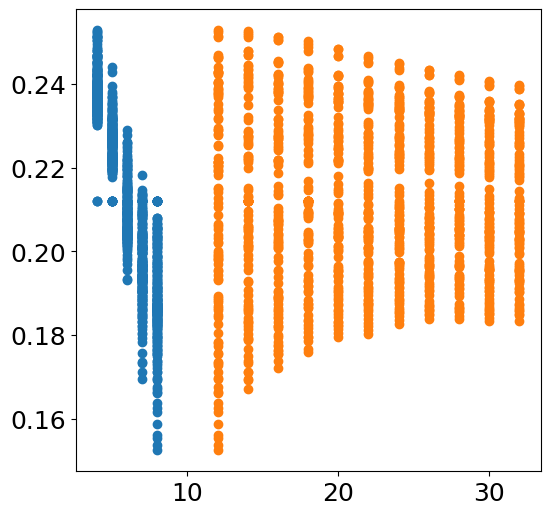

In [276]:

# plt.scatter(df['W (milli)'],df['gmax(milli)'])
plt.scatter(df['H (milli)'],df['Vt'])
plt.scatter(df['Lg (milli)'],df['Vt'])
# plt.scatter(df['LSP (milli)'],df['gmax(milli)'])
# plt.scatter(df['Vdd (milli)'],df['gmax(milli)'])
# plt.scatter(df['WK'],df['gmax(milli)'])
# plt.scatter(df['LSP (milli)'],df['gmax(milli)'])
# plt.axis([0,30,0.10,.30])
plt.show()

In [181]:
df

W (milli)  H (milli)  Lg (milli)  LSP (milli)  Vdd (milli)   WK   
0          22.0        8.0        32.0         10.0        100.0  4.8  \
1          22.0        8.0        32.0         20.0        100.0  4.8   
2          22.0        8.0        12.0         10.0        100.0  4.8   
3          22.0        8.0        12.0         20.0        100.0  4.8   
4          22.0        8.0        14.0         10.0        100.0  4.8   
...         ...        ...         ...          ...          ...  ...   
1205       30.0        7.0        26.0         20.0        100.0  4.8   
1206       30.0        7.0        28.0         10.0        100.0  4.8   
1207       30.0        7.0        28.0         20.0        100.0  4.8   
1208       30.0        7.0        30.0         10.0        100.0  4.8   
1209       30.0        7.0        30.0         20.0        100.0  4.8   

      gmax(milli)  ioff(pico)  isat(milli)     sslop        Vt  
0        0.198001      0.0641     0.084300  0.598844  0.186132  
1        0.177717      0.0610     0.072800  0.598906  0.187541  
2        0.260814      3.2500     0.106868  0.657321  0.169880  
3        0.208664      3.4900     0.083100  0.668890  0.158831  
4        0.238361      1.4500     0.098400  0.652705  0.173755  
...           ...         ...          ...       ...       ...  
1205     0.262018      0.0813     0.092900  0.600359  0.193972  
1206     0.272038      0.0782     0.106638  0.599570  0.191091  
1207     0.250688      0.0712     0.087500  0.599756  0.194263  
1208     0.269298      0.0726     0.106276  0.598954  0.190488  
1209     0.250918      0.0661     0.088000  0.599236  0.193449  

[1210 rows x 11 columns]

In [182]:
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['font.size'] = '18'
plt.subplots_adjust(left =0.5,right=0.8)

<Figure size 600x600 with 0 Axes>

In [183]:
def build_and_train_rf_model(y_param, train_frac=0.7, test_frac=0.3):
    test_n = int(test_frac * len(df))
    train_n = int(train_frac * len(df))
    
    test_indices = np.random.choice(df.index, test_n, replace=True)
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    train_indices = np.random.choice(train_df.index, train_n, replace=True)
    train_df_part = train_df.loc[train_indices]
    
    x_train = train_df_part.drop(output_params, axis=1)
    x_test = test_df.drop(output_params, axis=1)
    
    y_train = train_df_part[y_param]
    y_test = test_df[y_param]  # Target
    
    n_estimators = [5, 10, 20, 30, 50, 100]  # number of trees in the random forest
    max_features = ['auto', 'sqrt', 'log2', None] + list(range(1, len(input_params)))  # max features in consideration
    max_depth = [int(x) for x in np.linspace(10, 100, num=10)]  # maximum depth of each tree
    min_samples_split = [2, 4, 6, 10]  # minimum samples required to split a node
    min_samples_leaf = [1, 2, 3, 4, 5]  # minimum samples required at each leaf node
    bootstrap = [True, False]  # method used to sample data points

    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    
    
    # Initializing the Random Forest Regression model with 10 decision trees
    rf = RandomForestRegressor()

    # Fitting the Random Forest Regression model to the data
    rf.fit(x_train, y_train)
    
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                   n_iter=100, cv=5, verbose=2, random_state=35, n_jobs=-1)
    
    rf_random.fit(x_train, y_train)
    
    best_params = rf_random.best_params_
    print(best_params)
    
    randmf = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                   min_samples_split=best_params['min_samples_split'],
                                   min_samples_leaf=best_params['min_samples_leaf'],
                                   max_features=best_params['max_features'],
                                   max_depth=best_params['max_depth'],
                                   bootstrap=best_params['bootstrap'])
    
    randmf.fit(x_train, y_train)
    # Predicting the target values of the test set
    y_pred = randmf.predict(x_test)

    # RMSE (Root Mean Square Error)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("\nRMSE: ", rmse)
    
    r2score = r2_score(y_test, y_pred)
    print("\nr2_score: ", r2score, '\n')
    

    
#     from sklearn.metrics import confusion_matrix
#     cm = confusion_matrix(y_test,y_pred)
#     cm
#  we cannot find or draw the confusion metrics because there are multivariable in the output
    
#     accuracy = accuracy_score(y_test,y_pred)
#     print("accuracy:", accuracy)

    training_Score = randmf.score(x_train, y_train)
    print("training_Score: ", training_Score, '\n')
    
    return y_test, y_pred, r2score, rmse

# Assuming you have the function defined and the dataset loaded

# Call the function with the desired output parameter
y_test, y_pred, r2score, rmse = build_and_train_rf_model('gmax(milli)')

# Print the results
print("Actual Test Values:", y_test)
print("Predicted Values:", y_pred)
print("R2 Score:", r2score)
print("RMSE:", rmse)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=None

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_lea

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=lo

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, mi

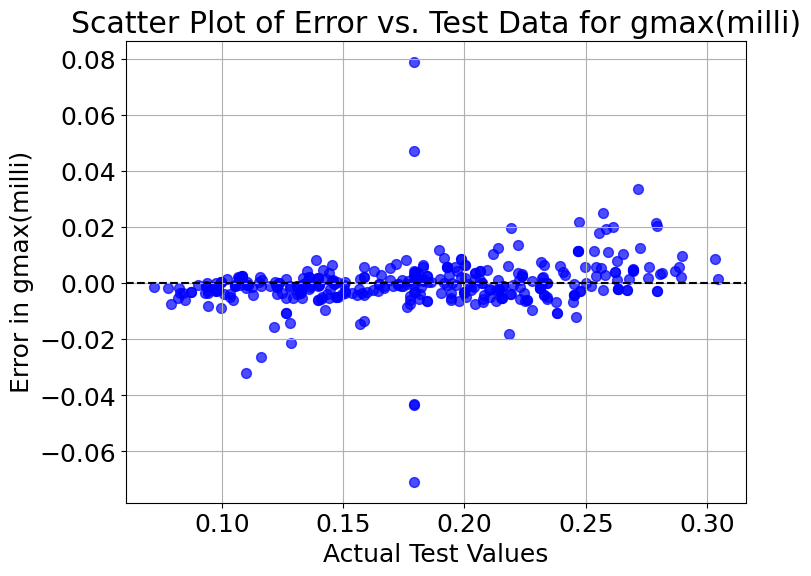

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samp

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=3

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_

In [481]:
import matplotlib.pyplot as plt

# Call the function with the desired output parameter
y_test, y_pred, r2score, rmse = build_and_train_rf_model('gmax(milli)')

# Calculate error
error = y_test - y_pred

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, error, color='blue', alpha=0.7,s = 50)  # Scatter plot of actual vs. error
plt.axhline(y=0, color='black', linestyle='--')  # Horizontal line at y=0
plt.title('Scatter Plot of Error vs. Test Data for gmax(milli)')
plt.xlabel('Actual Test Values')
plt.ylabel('Error in gmax(milli)')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samp

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, 

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 40, 'bootstrap': False}

RMSE:  0.1673251210222017

r2_score:  0.9229200693817883 

training_Score:  1.0 



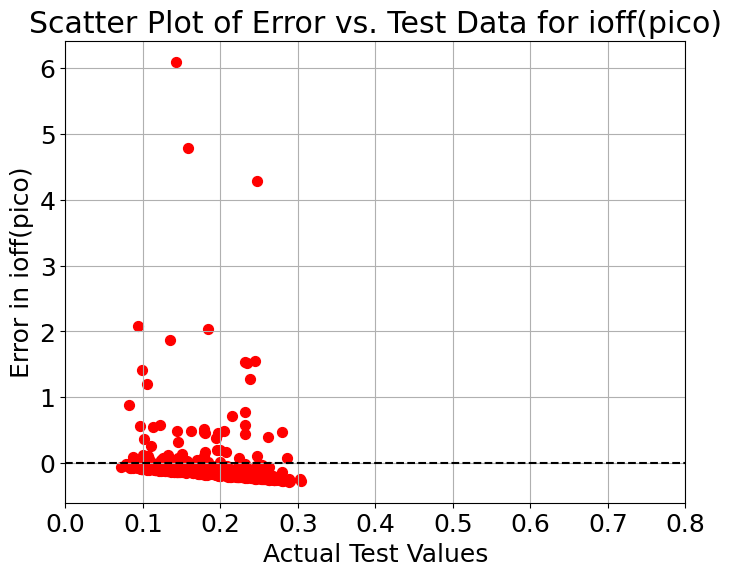

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, m

[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samp

In [484]:
import matplotlib.pyplot as plt

# Call the function with the desired output parameter
y_test2, y_pred, r2score, rmse = build_and_train_rf_model('ioff(pico)')


# Calculate error
error = y_pred - y_test

# Create scatter plot
plt.figure(figsize=(8, 6))

x = [i for i in range(1, len(y_test) + 1)]

plt.scatter(y_test, error, color='red',s =50)
plt.axhline(y=0, color='black', linestyle='--')  # Horizontal line at y=0
plt.xlim(0,0.8)
plt.title('Scatter Plot of Error vs. Test Data for ioff(pico)')
plt.xlabel('Actual Test Values')
plt.ylabel('Error in ioff(pico)')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_feat

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, m

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samp

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2

{'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 60, 'bootstrap': False}

RMSE:  0.00614546114223837

r2_score:  0.9281520766783519 

training_Score:  0.9986290763299346 



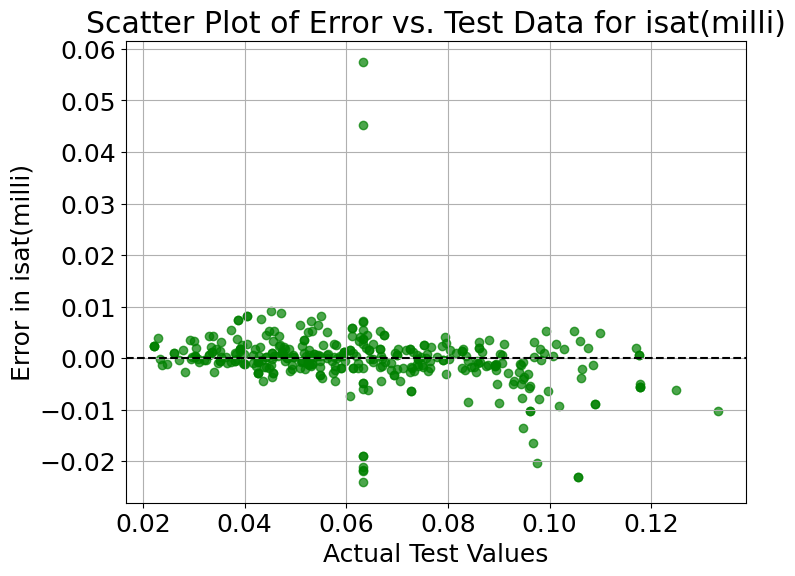

In [476]:
import matplotlib.pyplot as plt

# Call the function with the desired output parameter
y_test, y_pred, r2score, rmse = build_and_train_rf_model('isat(milli)')

# Calculate error
error = y_pred - y_test

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, error, color='green', alpha=0.7)  # Scatter plot of actual vs. error
plt.axhline(y=0, color='black', linestyle='--')  # Horizontal line at y=0
plt.title('Scatter Plot of Error vs. Test Data for isat(milli)')
plt.xlabel('Actual Test Values')
plt.ylabel('Error in isat(milli)')
plt.grid(True)
plt.show()



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time= 

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_lea

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqr

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, 

[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_sampl

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_sample

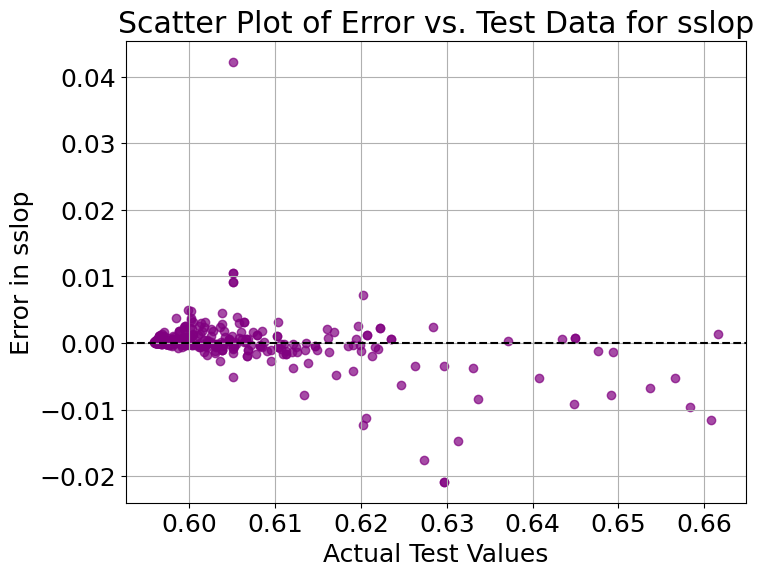

In [477]:

import matplotlib.pyplot as plt

# Call the function with the desired output parameter
y_test, y_pred, r2score, rmse = build_and_train_rf_model('sslop')

# Calculate error
error = y_pred - y_test

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, error, color='purple', alpha=0.7)  # Scatter plot of actual vs. error
plt.axhline(y=0, color='black', linestyle='--')  # Horizontal line at y=0
plt.title('Scatter Plot of Error vs. Test Data for sslop')
plt.xlabel('Actual Test Values')
plt.ylabel('Error in sslop')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] E

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_feature

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo


[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sq

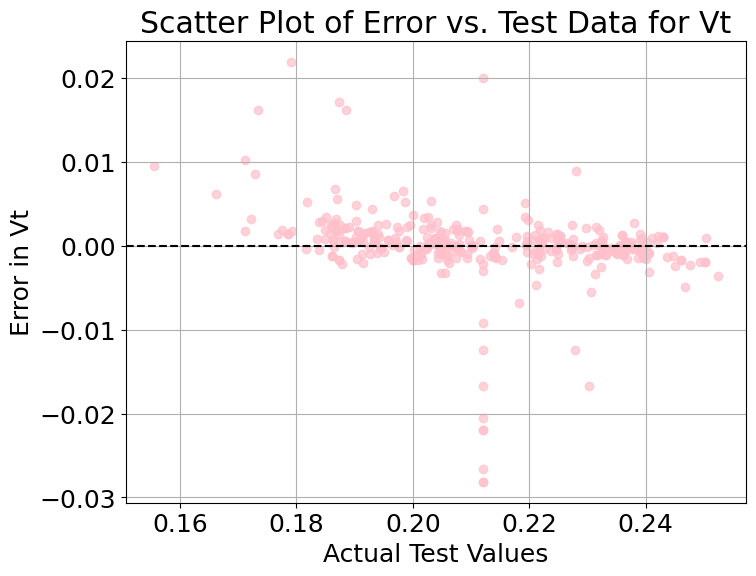

In [478]:
import matplotlib.pyplot as plt

# Call the function with the desired output parameter
y_test, y_pred, r2score, rmse = build_and_train_rf_model('Vt')

# Calculate error
error = y_pred - y_test

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, error, color='pink', alpha=0.7)  # Scatter plot of actual vs. error
plt.axhline(y=0, color='black', linestyle='--')  # Horizontal line at y=0
plt.title('Scatter Plot of Error vs. Test Data for Vt')
plt.xlabel('Actual Test Values')
plt.ylabel('Error in Vt')
plt.grid(True)
plt.show()
# build_and_train_rf_model('gmax(milli)')


# plt.scatter(y_test,np.abs(y_test - y_pred))

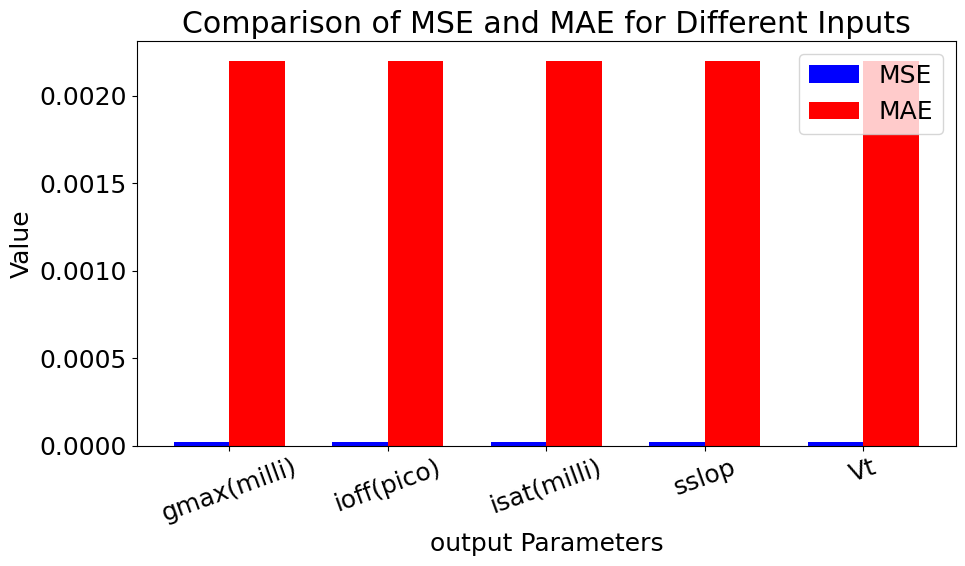

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min

[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min

In [479]:
import numpy as np
import matplotlib.pyplot as plt

mse_list = []
mae_list = []

for input_param in output_params:
    mse = np.mean((y_pred - y_test) ** 2)
    mae = np.mean(np.abs(y_pred - y_test))
        
    mse_list.append(mse)
    mae_list.append(mae)
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(output_params))

plt.bar(index, mse_list, bar_width, color='blue', label='MSE')
plt.bar(index + bar_width, mae_list, bar_width, color='red', label='MAE')

plt.xlabel('output Parameters')
plt.ylabel('Value')
plt.title('Comparison of MSE and MAE for Different Inputs')
plt.xticks(index + bar_width / 2, output_params, rotation=20)
plt.legend()
plt.tight_layout()
plt.show()

In [185]:
y_test_1,y_pred_1,r2score_1,rmse_1 = build_and_train_rf_model(y_param='ioff(pico)',train_frac=0.70,test_frac=0.30)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=1, 

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_le

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 20, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 10, 'bootstrap': False}

RMSE:  0.12401730262780392

r2_score:  0.9559422832394423 

training_Score:  0.9895681959063407 



In [304]:
y_test_1,y_pred_1,r2score_1,rmse_1 = build_and_train_rf_model(y_param='isat(milli)',train_frac=0.65,test_frac=0.35)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, m

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=1, 

{'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 2, 'max_depth': 80, 'bootstrap': False}

RMSE:  0.005817526556370756

r2_score:  0.9362075595593612 

training_Score:  0.9984761929692962 



In [305]:
y_test_1,y_pred_1,r2score_1,rmse_1 = build_and_train_rf_model(y_param='sslop',train_frac=0.70,test_frac=0.30)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total t

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_sam

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_le

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_le

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_sam


RMSE:  0.00410069287992571

r2_score:  0.9156325000881994 

training_Score:  0.9960745559056333 

[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n

[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min

[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_sampl

In [188]:
y_test_1,y_pred_1,r2score_1,rmse_1 = build_and_train_rf_model(y_param='Vt',train_frac=0.70,test_frac=0.30)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_sam

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=1, m

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, mi

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_sampl

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_featu

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 2, 'max_depth': 80, 'bootstrap': False}

RMSE:  0.0038662784973281157

r2_score:  0.9590074094662957 

training_Score:  0.9976403453324916 



In [189]:
def scatter_plot(vals,y_param):
    fig, ax = plt.subplots(figsize=(6,6))
    plt.scatter(vals[0][0],vals[0][1], label='10% train set',s=50)
    plt.scatter(vals[1][0],vals[1][1], label='25% train set',s=50)
    plt.scatter(vals[2][0],vals[2][1], label='50% train set',s=50)
    plt.scatter(vals[3][0],vals[3][1], label='70% train set',s=50)
    
    m, b = np.polyfit(vals[3][0],vals[3][1],1)
    plt.plot(vals[3][0], m*vals[3][0]+b,'--',color='gray',label = "Ideal prediction line",linewidth= 1)
    
    plt.xlabel('TCAD value of '+ y_param)
    plt.ylabel('Predicted value of '+ y_param)

    plt.legend(loc ="lower right",prop={"size":'14'})
    plt.show()

In [1]:
# def plot_error(vals):
#     x = [10,25,40,55,70]
#     for i in range(len(out_params)):
#         y = [vals[i][j][3] for j in range(len(x))]
#         plt.plot(x, y, label = output_params[i])
#     plt.title('RMSE error vs trainset size')
#     plt.xlabel('Trainset size')
#     plt.ylabel('RMSE error')
#     plt.legend()
#     plt.show()
    
# plot_error(gmax (milli))

In [191]:
def plot_r2score(vals):
    x = [10,25,40,55,70]
    for i in range(len(out_params)):
        y = [vals[i][j][2] for j in range(len(x))]
        plt.plot(x, y, label = output_params[i])
    plt.title('r2 score vs trainset size')
    plt.xlabel('Trainset size')
    plt.ylabel('r2 score')
    plt.legend()
    plt.show()

## Trainset from 10 to 70  with 10 percent increase

In [195]:
results=[]

In [196]:
train_set = [10,20,30,40,50,60,70]

In [197]:
for i in range(len(output_params)):
    train_set_wise = []
    print('Prediction for ',output_params[i],'\n')
    for sz in train_set:
        print('trainset size :',sz,'\n')
        train_set_wise.append(build_and_train_rf_model(y_param=output_params[i],train_frac= sz/100,test_frac=0.3))
    print('<------------------------------------------------------------------------------------------------------->')
    results.append(train_set_wise)

Prediction for  gmax(milli) 

trainset size : 10 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_feature

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 70, 'bootstrap': True}

RMSE:  0.0137563497855119

r2_score:  0.936518974165526 

training_Score:  0.9933654876990838 

trainset size : 20 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, mi

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samp

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samp

[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_fe

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_f

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo


[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_le

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_feat

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=lo

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 50, 'bootstrap': True}

RMSE:  0.011127247636767517

r2_score:  0.9574105984537365 

training_Score:  0.9927342410126583 

trainset size : 40 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, m

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_le

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqr

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_lea

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samp

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=aut

[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=3,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, 

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_feat

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=1

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_f

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_sam

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_l

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_l

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 50, 'bootstrap': True}

RMSE:  0.010256555152907342

r2_score:  0.9607220299779683 

training_Score:  0.9975851706227081 

trainset size : 70 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=Tr

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_lea

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=Non

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_sampl

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_lea

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 90, 'bootstrap': False}

RMSE:  0.3719105937241247

r2_score:  0.29109430603881925 

training_Score:  0.7487641799563347 

trainset size : 20 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_sampl

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=log2, m

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_featu

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 2, 'max_depth': 80, 'bootstrap': False}

RMSE:  0.2628079220740581

r2_score:  0.5192134782475406 

training_Score:  1.0 

trainset size : 30 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, m

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_l

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_fe

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_le

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2,

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 40, 'bootstrap': False}

RMSE:  0.17278435052204685

r2_score:  0.8724220344215385 

training_Score:  1.0 

trainset size : 40 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=3

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, mi

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, m

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_sam

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_l

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 70, 'bootstrap': True}

RMSE:  0.3367643332652828

r2_score:  0.7580764442672052 

training_Score:  0.9644233259966354 

trainset size : 50 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstr

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_sampl

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 40, 'bootstrap': False}

RMSE:  0.24750630005282567

r2_score:  0.5042293719976216 

training_Score:  1.0 

trainset size : 60 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_dept

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, mi

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_fea

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=a

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 40, 'bootstrap': False}

RMSE:  0.20184899739876327

r2_score:  0.8335943388209559 

training_Score:  1.0 

trainset size : 70 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_

[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 40, 'bootstrap': False}

RMSE:  0.14258714769636546

r2_score:  0.9335190895801933 

training_Score:  0.9999798792027189 

<------------------------------------------------------------------------------------------------------->
Prediction for  isat(milli) 

trainset size : 10 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=4,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_lea

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 70, 'bootstrap': True}

RMSE:  0.008769874435473514

r2_score:  0.8525173686642443 

training_Score:  0.9772698332935209 

trainset size : 20 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstr

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_le

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_feature

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_f

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, m

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, 

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_le

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, 

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 50, 'bootstrap': True}

RMSE:  0.006144562391775098

r2_score:  0.9255535664755146 

training_Score:  0.986359605401461 

trainset size : 40 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_le

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 50, 'bootstrap': True}

RMSE:  0.005124367804913428

r2_score:  0.9458605964404919 

training_Score:  0.9913116949867725 

trainset size : 50 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_d

[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_feat

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, mi

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=N

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_fe

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, m

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samp

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samp

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_sam

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=2, mi

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_featur

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 50, 'bootstrap': True}

RMSE:  0.00495959413108795

r2_score:  0.9491200049445739 

training_Score:  0.9959770474178173 

trainset size : 70 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=40, max_features=auto,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_feature

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 50, 'bootstrap': True}

RMSE:  0.005382650739139263

r2_score:  0.9463912072293545 

training_Score:  0.9952792372097679 

<------------------------------------------------------------------------------------------------------->
Prediction for  sslop 

trainset size : 10 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootst

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=N

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_lea


RMSE:  0.005920257588737391

r2_score:  0.7916195544449608 

training_Score:  0.9809041584083105 

trainset size : 20 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstr

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samp

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_l

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_f

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 50, 'bootstrap': True}

RMSE:  0.0031661078100518464

r2_score:  0.9398456219944804 

training_Score:  0.988715690870964 

trainset size : 30 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootst

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_l

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, 

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_sample

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 50, 'bootstrap': True}

RMSE:  0.0036342414408688326

r2_score:  0.9290222128153144 

training_Score:  0.9939886467414971 

trainset size : 40 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=1, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=F

[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_l

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, mi

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=2,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 70, 'bootstrap': True}

RMSE:  0.0036411169844237446

r2_score:  0.9202417029738087 

training_Score:  0.9915997858124906 

trainset size : 50 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, mi

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 40, 'bootstrap': False}

RMSE:  0.003487514345042742

r2_score:  0.9209070806856677 

training_Score:  1.0 

trainset size : 60 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, m

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=4,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo


[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samp

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=au

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_feat

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=aut

[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=4, min_samp

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_feature

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, m

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, m

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samp

[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_le

[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=3, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_featu

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqr

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 50, 'bootstrap': True}

RMSE:  0.0043716615942491835

r2_score:  0.9575820575282393 

training_Score:  0.9936286202654634 

trainset size : 30 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_lea

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto,

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

{'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 60, 'bootstrap': False}

RMSE:  0.0049046416273178135

r2_score:  0.9377356460819986 

training_Score:  0.9948450245947876 

trainset size : 40 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=90, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, 

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=lo

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=1, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_lea

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_sam

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=4, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.1s
[CV] E

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=4, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, 

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=None, min

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features

{'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 2, 'max_depth': 80, 'bootstrap': False}

RMSE:  0.005146773507121361

r2_score:  0.9329201204717699 

training_Score:  1.0 

trainset size : 60 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_f

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=4, min_sample

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=2, min_s

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=4, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_feature

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 50, 'bootstrap': True}

RMSE:  0.004724762805596931

r2_score:  0.9457726954752342 

training_Score:  0.9955186777431292 

trainset size : 70 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=Fals

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_sa

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_fea

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=80, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=lo

/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/gupta/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_s


RMSE:  0.006155465323402517

r2_score:  0.8993857335079344 

training_Score:  0.9987710280614224 

<------------------------------------------------------------------------------------------------------->


In [314]:
train_set_wise[1]

(1117    0.185100
 1176    0.203103
 670     0.185812
 36      0.235029
 728     0.215050
           ...   
 252     0.246636
 582     0.238955
 250     0.247782
 191     0.223860
 1091    0.195756
 Name: Vt, Length: 363, dtype: float64,
 array([0.18686093, 0.20534742, 0.18232314, 0.23620313, 0.20378287,
        0.21350268, 0.21958928, 0.20712057, 0.20217524, 0.18968637,
        0.17262805, 0.22597444, 0.22429636, 0.19084322, 0.23900335,
        0.22337667, 0.17553707, 0.24194691, 0.23198923, 0.24089282,
        0.17369874, 0.1782894 , 0.18455527, 0.20382177, 0.20573781,
        0.1867431 , 0.17369874, 0.20389097, 0.23034111, 0.24059474,
        0.22367943, 0.1885321 , 0.23435938, 0.24288427, 0.23955961,
        0.20462482, 0.2051415 , 0.23411091, 0.23955144, 0.19807602,
        0.18687313, 0.20097256, 0.1916509 , 0.20534742, 0.2412646 ,
        0.20448103, 0.19381634, 0.23522781, 0.23681822, 0.19662538,
        0.20752138, 0.22364075, 0.2085875 , 0.21088089, 0.19720041,
        0.1948

In [330]:
results

[[(680     0.196433
   541     0.173097
   743     0.164296
   410     0.126322
   1086    0.288729
             ...   
   360     0.121176
   462     0.128776
   1032    0.217536
   1020    0.237264
   112     0.138756
   Name: gmax(milli), Length: 363, dtype: float64,
   array([0.21315769, 0.1697102 , 0.17413627, 0.12544727, 0.26305156,
          0.1095639 , 0.1327149 , 0.2508983 , 0.10428454, 0.10204667,
          0.22381598, 0.20338692, 0.22895985, 0.1738151 , 0.18641092,
          0.19582487, 0.15498391, 0.12591456, 0.26019162, 0.10287434,
          0.22127962, 0.25746988, 0.22412842, 0.18550918, 0.25452378,
          0.21781201, 0.25746988, 0.23465334, 0.22187716, 0.179858  ,
          0.09309629, 0.21994444, 0.11529304, 0.22816016, 0.23928099,
          0.1032358 , 0.2047348 , 0.20269941, 0.20947906, 0.25077273,
          0.22579504, 0.19897732, 0.22771731, 0.09253262, 0.20329893,
          0.23584892, 0.19277817, 0.15390773, 0.17244005, 0.14435493,
          0.17404622, 0.10836

In [337]:
results[0][0][1][1]

0.16971020126689293

In [200]:
labels = ['gmax(milli)', 'ioff(pico)', 'isat(milli)','sslop', 'Vt']

In [201]:
def rmse_plot_and_save(item,unit,c):
    y = [results[item][i][3] for i in range(len(train_set))]
    plt.plot(train_set, y, label = labels[item],linewidth=3,color=c,marker='x',markeredgecolor='black', markersize=8)
    plt.title('RMSE vs Trainset size')
    plt.xlabel('Training data (%)')
    plt.ylabel('RMSE for '+labels[item])
    plt.xticks(train_set)
    plt.legend(loc ="upper right",prop={"size":'14'})
#     plt.savefig('plots/RMSE for'+labels[item]+'.jpg',bbox_inches='tight')

gmax(milli)


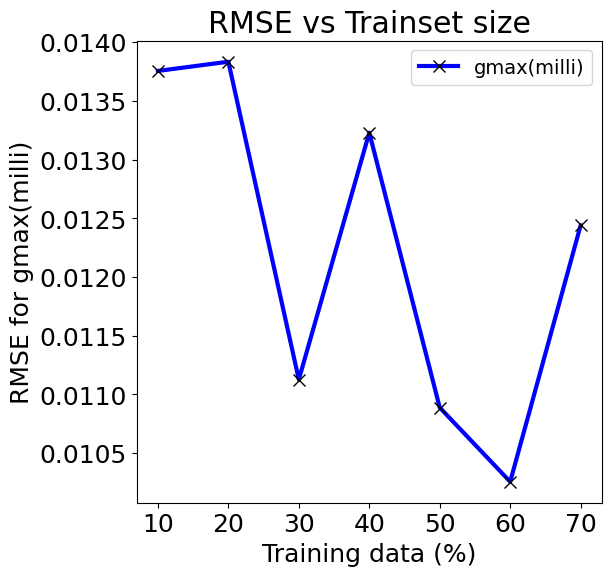

In [202]:
item = 0
rmse_plot_and_save(item,"milli",'blue')
print(output_params[item])
item+=1

ioff(pico)


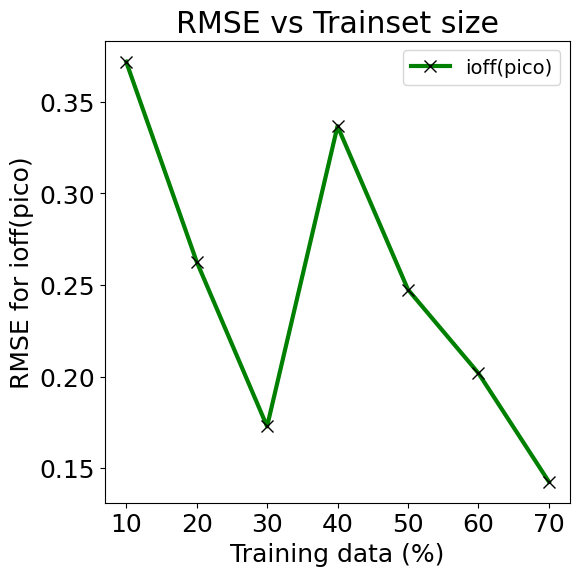

In [203]:
rmse_plot_and_save(item,'V','green')
print(output_params[item])
item+=1

isat(milli)


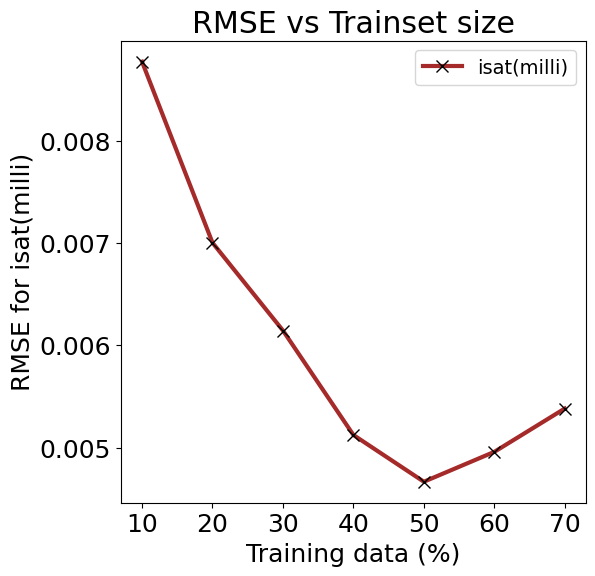

In [204]:
rmse_plot_and_save(item,"K",'brown')
print(output_params[item])
item+=1

sslop


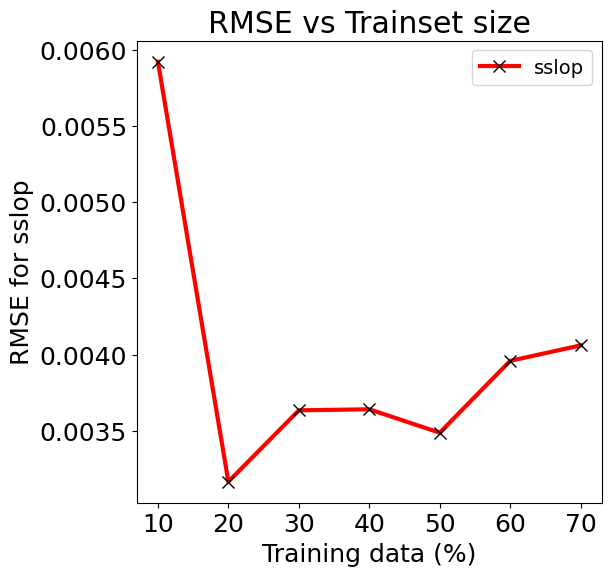

In [205]:
rmse_plot_and_save(item,"K",'red')
print(output_params[item])
item+=1

Vt


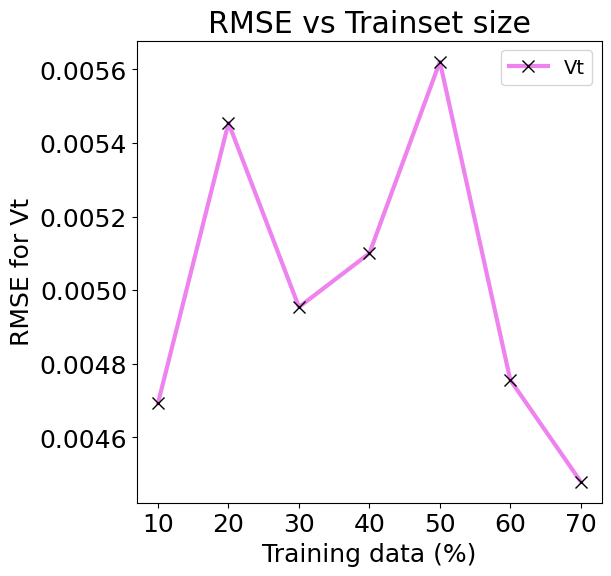

In [476]:
rmse_plot_and_save(item,"K",'violet')
print(output_params[item])

In [267]:
def plot_r2score_vs_trainset(vals):
    x = train_set
    plt.ylim(0.6, 1)
    for i in range(len(output_params)):
        y = [vals[i][j][2] for j in range(len(x))]
        plt.plot(x, y, label = labels[i],linewidth=3,marker='x',markeredgecolor='black', markersize=8)
    plt.title('r2 score vs training set size')
    plt.xlabel('Training set size')
    plt.ylabel('r2 score')
    plt.xticks(train_set)
    plt.legend(loc ="lower right",prop={"size":'14'})
#     plt.savefig('plots/r2_score.jpg',bbox_inches='tight')
    plt.show()

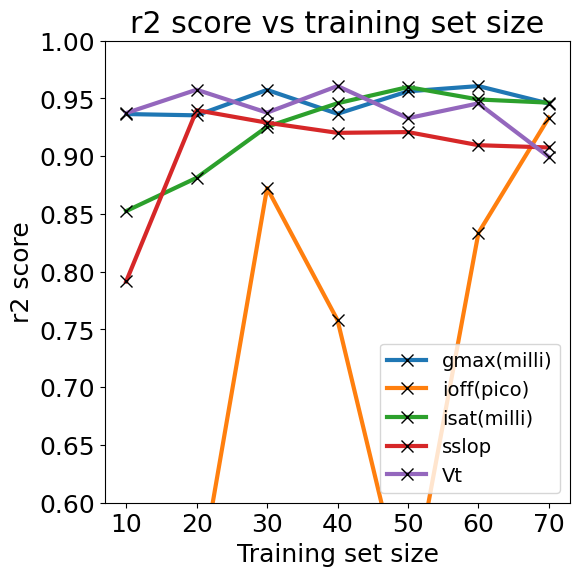

In [268]:
plot_r2score_vs_trainset(results)

In [412]:
results

[[(680     0.196433
   541     0.173097
   743     0.164296
   410     0.126322
   1086    0.288729
             ...   
   360     0.121176
   462     0.128776
   1032    0.217536
   1020    0.237264
   112     0.138756
   Name: gmax(milli), Length: 363, dtype: float64,
   array([0.21315769, 0.1697102 , 0.17413627, 0.12544727, 0.26305156,
          0.1095639 , 0.1327149 , 0.2508983 , 0.10428454, 0.10204667,
          0.22381598, 0.20338692, 0.22895985, 0.1738151 , 0.18641092,
          0.19582487, 0.15498391, 0.12591456, 0.26019162, 0.10287434,
          0.22127962, 0.25746988, 0.22412842, 0.18550918, 0.25452378,
          0.21781201, 0.25746988, 0.23465334, 0.22187716, 0.179858  ,
          0.09309629, 0.21994444, 0.11529304, 0.22816016, 0.23928099,
          0.1032358 , 0.2047348 , 0.20269941, 0.20947906, 0.25077273,
          0.22579504, 0.19897732, 0.22771731, 0.09253262, 0.20329893,
          0.23584892, 0.19277817, 0.15390773, 0.17244005, 0.14435493,
          0.17404622, 0.10836

In [411]:
len(results[item][0][0])

363

In [2]:
# def plot_error(item, unit, c, mini, maxi):
# #     if item not in results:
# #         print(f"Error: Key '{item}' not found in results dictionary.")
# #         return
    
#     if len(results[item]) < 7:
#         print(f"Error: Key '{item}' does not contain expected data structure.")
#         return

#     errors = [results[item][6][1][i] - results[item][6][0][i] for i in range(len(results[item][0][0]))]
#     x = [i for i in range(1, len(results[item][0][0]) + 1)]
#     fig, ax = plt.subplots(figsize=(6, 6))
#     plt.scatter(x, errors, label='error', s=50, color=c)
#     plt.ylim(mini, maxi)
#     plt.xlabel('Number of the test sample')
#     plt.ylabel('Error in ' + unit)
#     plt.xticks(train_set[:-1])
#     plt.show()

# plot_error(1, 'gmax(milli)', "blue", -10, 10)


In [269]:
def scatter_pred_vs_ideal(item,unit,c,ls=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.scatter(results[item][6][0],results[item][6][1], label='70% train set',s=20,color=c)
    
    m, b = np.polyfit(results[item][6][0],results[item][6][1],1)
    plt.plot(results[item][6][0], m*results[item][6][0]+b,'--',color='gray',label = "Ideal prediction line",linewidth= 1)
    
    plt.xlabel('TCAD value of '+ labels[item])
    plt.ylabel('Predicted value of '+ labels[item])
    if ls is not None:
        plt.xticks(ls,rotation=90)

    plt.legend(loc ="lower right",prop={"size":'14'})
#     plt.savefig('plots/Ideal vs pred for'+labels[item]+'.jpg',bbox_inches='tight')
    plt.show()

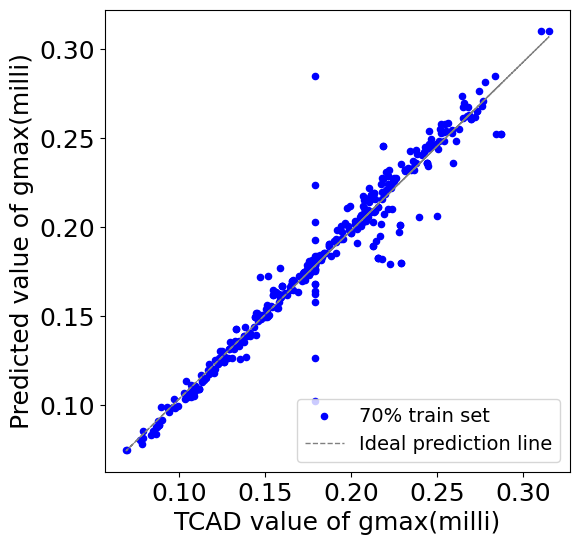

In [277]:
scatter_pred_vs_ideal(0,' (µA)','blue')

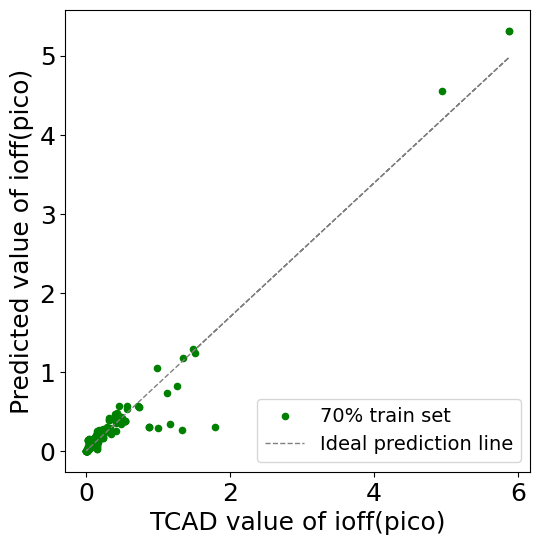

In [278]:
scatter_pred_vs_ideal(1,' (V)','green')

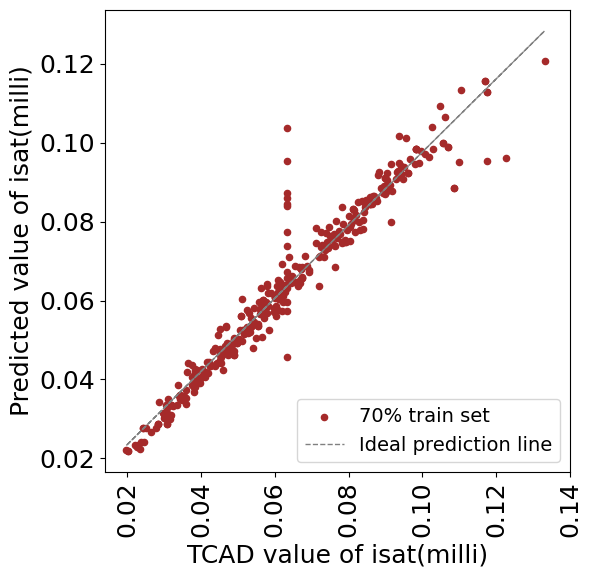

In [289]:
scatter_pred_vs_ideal(2,' (K)','brown',[0.02*(i+1) for i in range(7)])

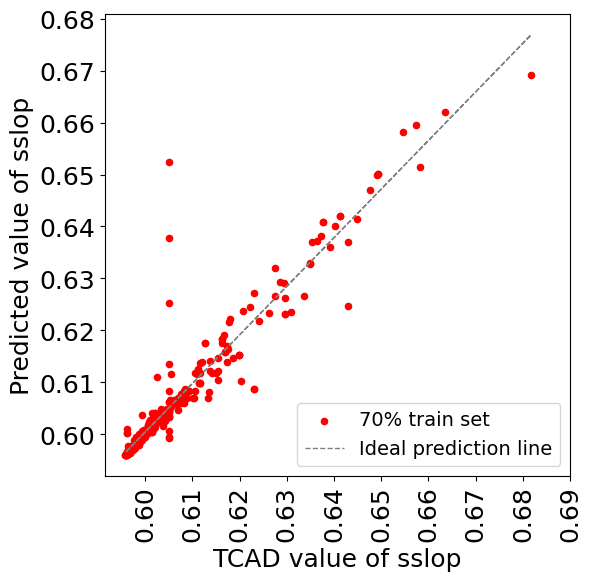

In [303]:
scatter_pred_vs_ideal(3,' (K)','red',[0.6+(i*0.01)for i in range(10)])

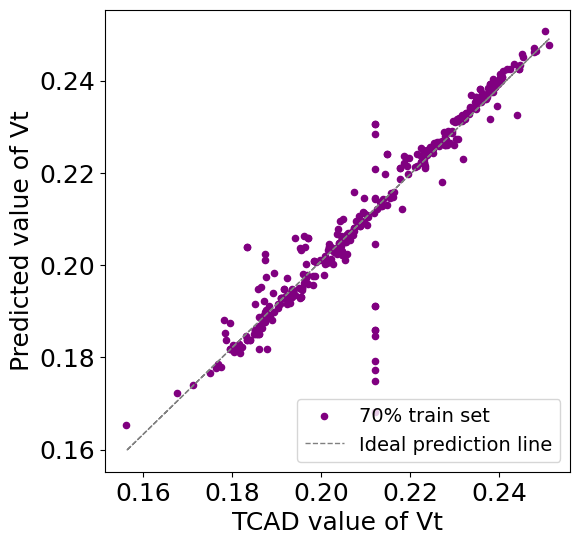

In [274]:
scatter_pred_vs_ideal(4,' (K)','purple')